# Demonstrate standard major axis (SMA) fitting #

We will compare how two statistical fitting procedures compare to each other in the presence of noise and outliers.
The two methods are Standard Major Axis (SMA) and Ordinary Least Squares (OLS) regression

Steps
1. Generate some synthetic data from a known model
2. Add noise
3. Fit the noisy data with two methods
4. Print and visualize the results

## Generate synthetic data

In [1]:
## User-defined variables ##

# Specify true slope and intercept to use
slope_true      = 2
intercept_true  = 1

# Number of data points to create
n = 1000

# standard deviation of noise
# low noise ~ 0.1
# high noise > ~1 
noise_std = 1

# Set whether to add outliers or not
add_outliers = True

In [2]:
import numpy as np

# Create points with specified slope and intercept
# x is normally distributed
xtrue = 3 + np.random.randn(n) 
ytrue = xtrue * slope_true + intercept_true

In [3]:
# Noisy versions of x and y

# Add noise to x and y
xnoisy = xtrue + np.random.randn(n) * noise_std
ynoisy = ytrue + np.random.randn(n) * noise_std

# Add outliers if requested
if add_outliers:

    # Index location of outliers
    idx = np.random.randint(0,n-1,4)

    # Specify outlier values
    xnoisy[idx] = xnoisy[idx] + 100 * noise_std
    ynoisy[idx] = ynoisy[idx] + 1000 * noise_std

    # A different kind of noise
    # ynoisy = ynoisy + np.random.standard_cauchy(n)


## Fit the data with multiple methods

In [4]:
from acgc.stats import sma, bivariate_line_equation

# SMA fit, use robust methods to minimize effect of outliers
sma_result = sma( xnoisy, ynoisy, 
                alpha=0.95 )

# Robust SMA
rsma_result = sma( xnoisy, ynoisy, 
                alpha=0.95,
                robust=True )

In [5]:
import statsmodels.formula.api as smf

# OLS for comparison
ols_result = smf.ols('y ~ x + 1', {'x':xnoisy, 'y':ynoisy} ).fit()

# standard error of fit parameters
ols_ste_params = np.sqrt( np.diag( ols_result.cov_params() ) )

## Print parameters of the fitted lines

`sma_results` is a dict containing the following keys: ['slope', 'intercept', 'slope_ste', 'intercept_ste', 'slope_interval', 'intercept_interval', 'alpha', 'df_model', 'df_resid', 'params', 'nobs', 'fittedvalues', 'resid']

In [6]:
# Print slope and intercept
fmt = '{:15s}{:8.4f} ± {:8.4f}'

print('\nParameters')
print('True')
print(fmt.format('slope',       slope_true, 0))
print(fmt.format('intercept',   intercept_true, 0))

print('\nOLS')
print(fmt.format('slope',       ols_result.params.iloc[1], ols_ste_params[1] ))
print(fmt.format('intercept',   ols_result.params.iloc[0], ols_ste_params[0] ))

print('\nSMA')
print(fmt.format('slope',       sma_result['slope'],        sma_result['slope_ste']))
print(fmt.format('intercept',   sma_result['intercept'],    sma_result['intercept_ste']))

print('\nRobust SMA')
print(fmt.format('slope',       rsma_result['slope'],        rsma_result['slope_ste']))
print(fmt.format('intercept',   rsma_result['intercept'],    rsma_result['intercept_ste']))


Parameters
True
slope            2.0000 ±   0.0000
intercept        1.0000 ±   0.0000

OLS
slope            9.5144 ±   0.0606
intercept      -21.0556 ±   0.4436

SMA
slope            9.7049 ±   0.0606
intercept      -21.6979 ±   0.4454

Robust SMA
slope            1.5131 ±   0.0385
intercept        2.5436 ±   0.1269


In [13]:
# For SMA, the equation for the fitted line can be written as a string
print( bivariate_line_equation(sma_result,  floatformat='{:.4f}', include_error=True) )
print( bivariate_line_equation(rsma_result, floatformat='{:.4f}', include_error=True) )

y_SMA = (9.7049 ± 0.0606) x + (-21.6979 ± 0.4454)
y_rSMA = (1.5131 ± 0.0385) x + (2.5436 ± 0.1269)


## Graph the fitted lines and noisy data

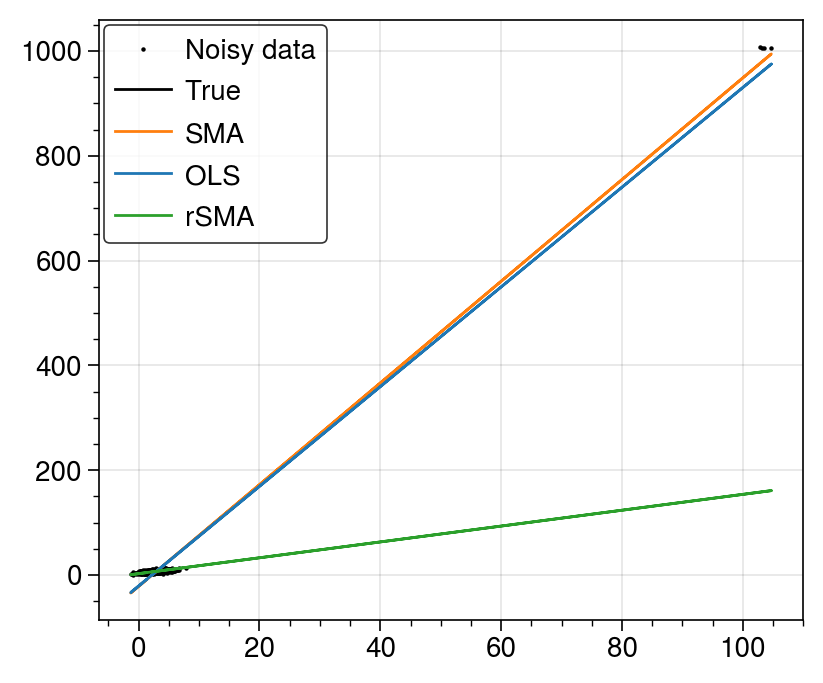

In [8]:
import matplotlib.pyplot as plt
import acgc.figstyle

# Noisy data
plt.scatter( xnoisy, ynoisy, 
            s=1, color='black', label='Noisy data') 
# True relationship
plt.plot( xtrue, ytrue, 
          color='black', linewidth=1, label='True')

# Fitted relationships
plt.plot( xnoisy, sma_result['slope'] * xnoisy + sma_result['intercept'],
         color='C1', linewidth=1, label='SMA')
plt.plot( xnoisy, ols_result.fittedvalues.values,
         color='C0', linewidth=1, label='OLS')
if add_outliers:
    plt.plot( xnoisy, rsma_result['slope'] * xnoisy + rsma_result['intercept'],
            color='C2', linewidth=1, label='rSMA')

# Legend
plt.legend()